In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

In [0]:
np.random.seed(0)

In [0]:
X,y=make_blobs(n_samples=5000,centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

In [9]:
X

array([[-1.82150565,  0.07098024],
       [ 2.16732621, -2.93199608],
       [ 0.8465158 , -3.26075305],
       ...,
       [ 3.29772603,  4.24400152],
       [-1.69503125, -0.29979681],
       [-1.64362141,  0.63035513]])

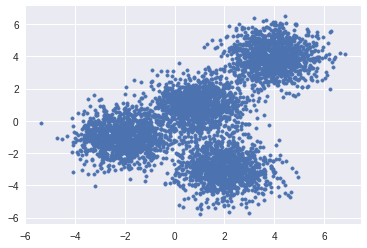

In [10]:
plt.scatter(X[:,0],X[:,1],marker='.')

In [0]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [12]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

In [16]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

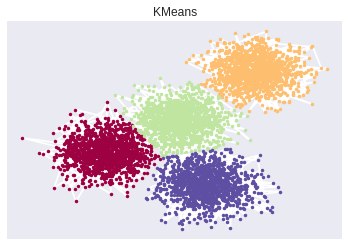

In [17]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


In [18]:
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

--2018-08-22 08:05:14--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  33.47K  --.-KB/s    in 0.02s   

2018-08-22 08:05:15 (1.52 MB/s) - ‘Cust_Segmentation.csv’ saved [34276/34276]



In [19]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [20]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [26]:
df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

In [0]:
from sklearn.preprocessing import StandardScaler

In [28]:
X=np.asanyarray(df[["Age","Edu","Years Employed","Income","Card Debt","Defaulted","DebtIncomeRatio"]])
X

array([[41.   ,  2.   ,  6.   , ...,  0.124,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  4.582,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  6.111,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  2.802,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.116,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  1.866,  0.   ,  8.6  ]])

In [37]:
X[:,0]

array([41., 47., 33., 29., 47., 40., 38., 42., 26., 47., 44., 34., 24.,
       46., 28., 24., 29., 43., 44., 36., 29., 36., 28., 45., 37., 43.,
       24., 37., 38., 34., 40., 42., 23., 40., 28., 33., 35., 37., 22.,
       39., 20., 48., 28., 37., 48., 45., 22., 30., 28., 29., 47., 36.,
       24., 56., 29., 34., 32., 27., 40., 50., 39., 34., 36., 44., 24.,
       31., 34., 26., 38., 24., 30., 40., 30., 25., 29., 33., 43., 35.,
       41., 46., 33., 30., 40., 38., 49., 26., 22., 29., 28., 23., 37.,
       35., 31., 29., 34., 47., 37., 38., 32., 22., 30., 38., 36., 44.,
       27., 47., 41., 25., 33., 42., 36., 25., 30., 24., 32., 39., 30.,
       33., 32., 33., 29., 28., 33., 39., 32., 46., 32., 28., 26., 27.,
       35., 35., 31., 32., 29., 35., 48., 24., 44., 40., 36., 23., 26.,
       30., 34., 28., 37., 46., 24., 25., 33., 46., 38., 47., 34., 35.,
       39., 44., 28., 31., 24., 36., 35., 31., 28., 36., 31., 30., 26.,
       48., 39., 31., 31., 27., 31., 53., 40., 26., 29., 52., 39

In [31]:
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.68381116,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.41447366,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  2.13414111,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.5766659 ,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.68757659,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.13611081,
        -0.52379654, -0.2340332 ]])

In [32]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 2 1 1 0 2 1 2 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 1 1 2 1 2 1 1 1 1 1 1
 1 1 2 1 2 1 0 1 2 1 1 1 2 2 1 1 2 2 1 1 1 2 1 2 1 2 2 1 1 2 1 1 1 2 2 2 1
 1 1 1 1 2 1 2 2 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 2 1 2 2 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1
 1 1 1 1 2 1 1 2 1 2 1 1 2 0 1 2 1 1 1 1 1 1 0 2 1 1 1 1 2 1 1 2 2 1 2 1 2
 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 1 2 2 1 1 1 1 1 1
 1 1 1 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 2 2 1
 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 0 1 1 1 2 1 2 2 2 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 0
 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 2 1 0 1 1 1 1 2 1 2 2 2 1 1 2 2 1 1 1 1 1 1
 1 2 1 1 1 1 2 1 1 1 2 1 

In [33]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [34]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
1,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
2,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824


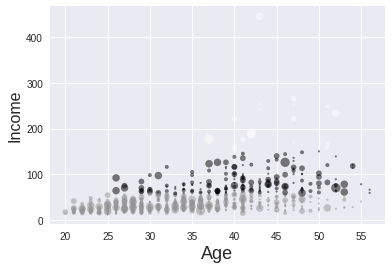

In [38]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()
